In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yoloface_detect_align_module import yoloface
import torch
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from yoloface_detect_align_module import yoloface
from ultraface_detect_module import ultraface
from ssdface_detect_module import ssdface
from retinaface_detect_align_module import retinaface, retinaface_dnn
from mtcnn_pfld_landmark import mtcnn_detect as mtcnnface
from facebox_detect_module import facebox_pytorch as facebox
from facebox_detect_module import facebox_dnn
from dbface_detect_align_module import dbface_detect as dbface
from centerface_detect_align_module import centerface
from lffd_detect_module import lffdface
from libfacedetect_align_module import libfacedet
from yolo5face import yolo5face
from tqdm import tqdm
sns.set_style('darkgrid')

In [2]:
os.path.abspath('./')

'D:\\research_project'

In [3]:
os.listdir(os.path.join(os.path.abspath('./'),'/research_project/research_data/widerface/test/images/'))

['.DS_Store',
 '0--Parade',
 '1--Handshaking',
 '10--People_Marching',
 '11--Meeting',
 '12--Group',
 '13--Interview',
 '14--Traffic',
 '15--Stock_Market',
 '16--Award_Ceremony',
 '17--Ceremony',
 '18--Concerts',
 '19--Couple',
 '2--Demonstration',
 '20--Family_Group',
 '21--Festival',
 '22--Picnic',
 '23--Shoppers',
 '24--Soldier_Firing',
 '25--Soldier_Patrol',
 '26--Soldier_Drilling',
 '27--Spa',
 '28--Sports_Fan',
 '29--Students_Schoolkids',
 '3--Riot',
 '30--Surgeons',
 '31--Waiter_Waitress',
 '32--Worker_Laborer',
 '33--Running',
 '34--Baseball',
 '35--Basketball',
 '36--Football',
 '37--Soccer',
 '38--Tennis',
 '39--Ice_Skating',
 '4--Dancing',
 '40--Gymnastics',
 '41--Swimming',
 '42--Car_Racing',
 '43--Row_Boat',
 '44--Aerobics',
 '45--Balloonist',
 '46--Jockey',
 '47--Matador_Bullfighter',
 '48--Parachutist_Paratrooper',
 '49--Greeting',
 '5--Car_Accident',
 '50--Celebration_Or_Party',
 '51--Dresses',
 '52--Photographers',
 '53--Raid',
 '54--Rescue',
 '55--Sports_Coach_Trainer

In [4]:
img = cv2.imread('./research_data/widerface/val/images/0--Parade/0_Parade_marchingband_1_353.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

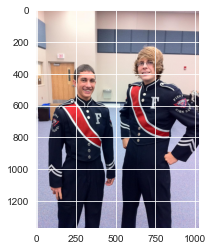

In [5]:
plt.imshow(img)

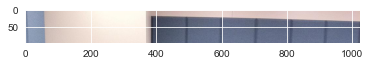

In [6]:
plt.imshow(img[100:200,:])

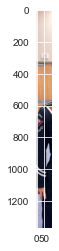

In [7]:
plt.imshow(img[:,100:200])

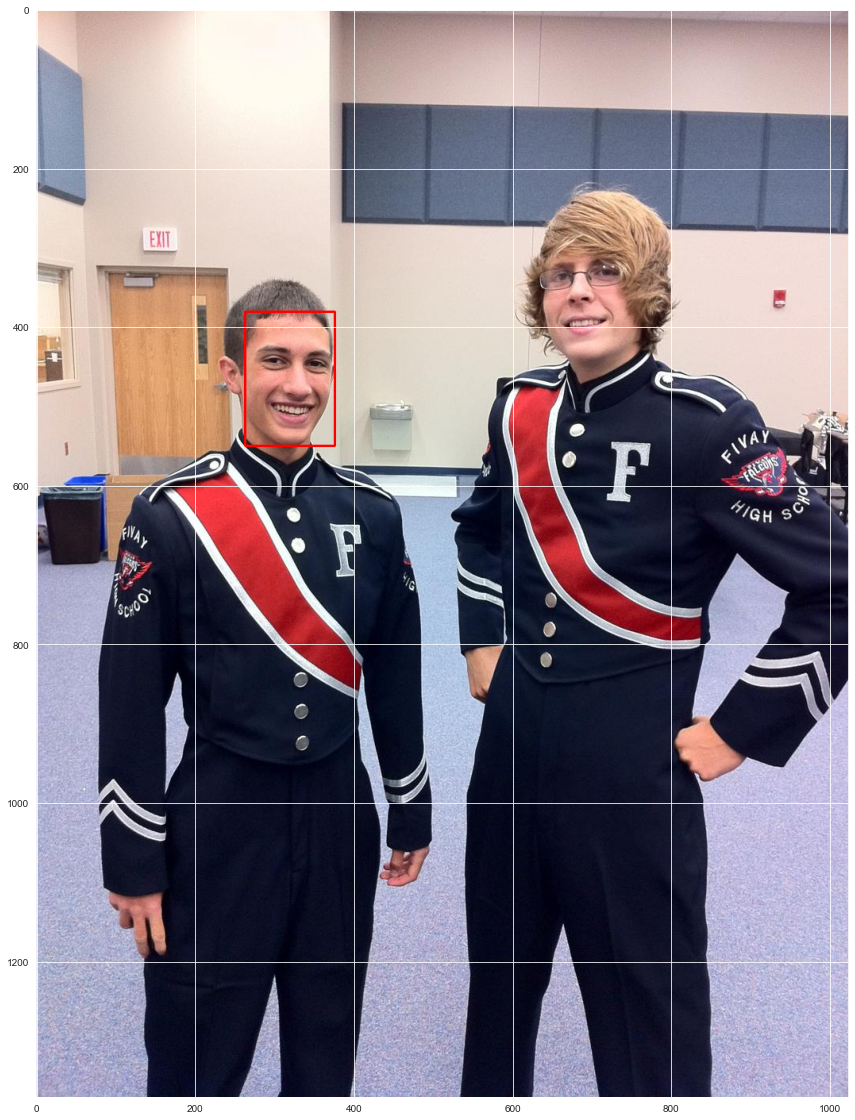

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.rectangle(img,(263,381),(263+113,381+169),thickness=2,color=(255,0,0)))

In [9]:
val_path = os.path.join(os.path.abspath('./'),'/research_project/research_data/widerface/val/')
test_path = os.path.join(os.path.abspath('./'),'/research_project/research_data/widerface/test/')
#get val
f = open(os.path.join(val_path,'label.txt'),'r')

labels = {}
images = []
cur_file = None
cur_file_boxes = []

while True:
    line = f.readline()
    if not line:
        break
    if line.startswith('#'):
        if cur_file is not None:
            labels[cur_file] = cur_file_boxes
        _,file_name = line.split()
        images.append(file_name)
        cur_file = file_name
        cur_file_boxes = []
    else:
        a,b,c,d = line.split()
        a,b,c,d = int(a), int(b), int(c), int(d)
        x1,y1,x2,y2 = a,b,a+c,b+d
        cur_file_boxes.append([x1,y1,x2,y2])

#get test images
# f = open(os.path.join(test_path,'label.txt'),'r')
# images = []
# while True:
#     line = f.readline()
#     if not line:
#         break
#     images.append(line.split()[1])

In [10]:
labels['0--Parade/0_Parade_Parade_0_960.jpg']

[[48, 210, 160, 368],
 [232, 24, 300, 124],
 [712, 240, 778, 340],
 [878, 192, 958, 300]]

In [11]:
images[-1]

'9--Press_Conference/9_Press_Conference_Press_Conference_9_183.jpg'

In [12]:
y5f = yolo5face.yolov5('yolov5l')

In [13]:
yoloface_detect = yoloface(device='cuda', align=False)
centerface_detect = centerface(align=True)
centerface_detect2 = centerface(align=False)

C:\Users\trist\anaconda3\envs\Pytorch\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(307, 240, 328, 268)
307 328 240 268


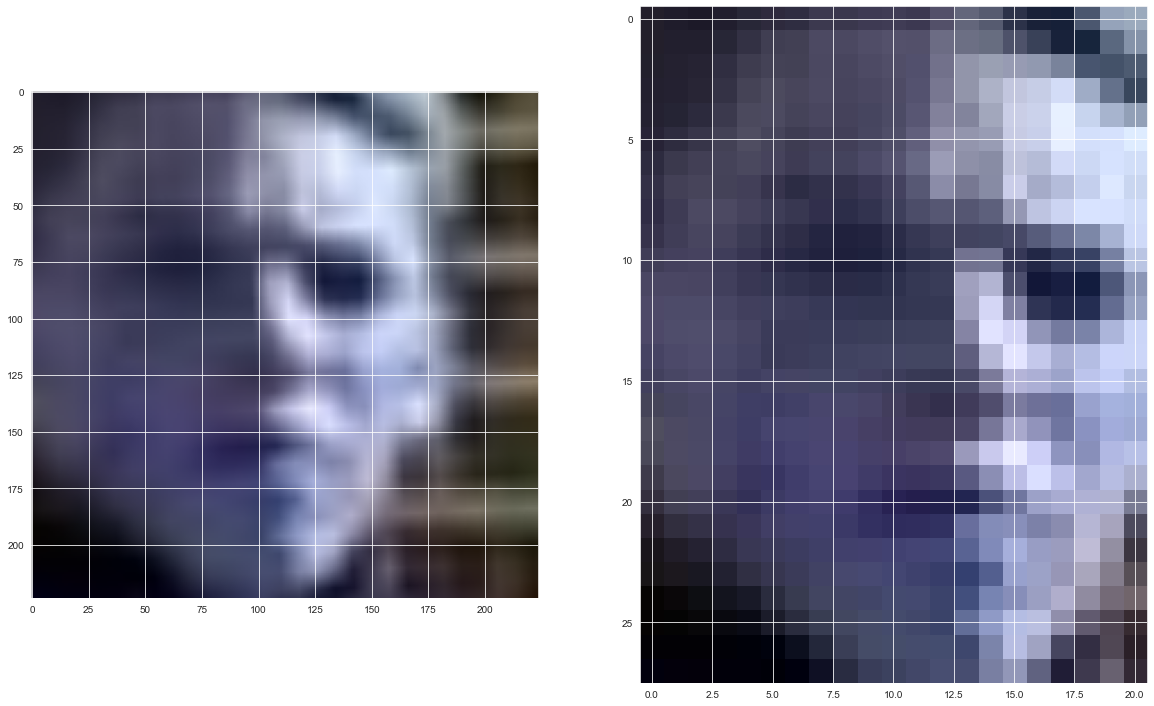

In [14]:
plt.figure(figsize=(20,20))
des = os.path.join(val_path,'images/',images[1])
# img = cv2.imread('./WeChat Image_20200628232908.jpg')
img = cv2.imread(des)
yolo_result, _ = yoloface_detect.detect(img)
center_result, _ = centerface_detect.detect(img)
box, roi = centerface_detect.get_face(img)
box1, roi1 = centerface_detect2.get_face(img)

x1,y1,x2,y2 = box[0][:4]
print(box[0][:4])
print(x1,x2,y1,y2)
res = np.hstack([yolo_result,center_result])

plt.subplot(1,2,1)
plt.imshow(roi[0]) #before alignment
plt.subplot(1,2,2)
plt.imshow(roi1[0]) #after alighment

In [12]:
def valid_txt(model, name, images,val_p):
    save_folder = './validation/' + name + '/widerface_txt/'
    for image in tqdm(images):
        des = os.path.join(val_p,'images/',image)
        img = cv2.imread(des)
        boxes,_ = model.get_face(img)  
        save_name = save_folder + image[:-4] + ".txt"
        dirname = os.path.dirname(save_name)
        if not os.path.isdir(dirname):
            os.makedirs(dirname)

        with open(save_name, "w") as fd:
            bboxs = boxes
            file_name = os.path.basename(save_name)[:-4] + "\n"
            bboxs_num = str(len(bboxs)) + "\n"
            fd.write(file_name)
            fd.write(bboxs_num)
            for box in bboxs:
                x = int(box[0])
                y = int(box[1])
                w = int(box[2]) - int(box[0])
                h = int(box[3]) - int(box[1])
                confidence = str(box[4])
                line = str(x) + " " + str(y) + " " + str(w) + " " + str(h) + " " + confidence + " \n"
                fd.write(line)

In [14]:
yoloface_detect = yoloface(device='cpu', align=False)
ultraface_detect = ultraface()
ssdface_detect = ssdface()
retinaface_detect = retinaface(device='cpu', align=False)
retinaface_dnn_detect = retinaface_dnn(align=False)
retinaface_res_detect = retinaface(align=True,device='cpu',net='res50')
mtcnn_detect = mtcnnface(device='cpu', align=False)
facebox_detect = facebox(device='cpu')
facebox_dnn_detect = facebox_dnn()
dbface_detect = dbface(net_type='dbface',device='cpu', align=False)
centerface_detect = centerface(align=False)
lffdface_detect = lffdface(version=1)
libface_detect = libfacedet(align=False)

In [14]:
save_folder = './validation/' + 'yolo5face' + '/widerface_txt/'
for image in tqdm(images):
    des = os.path.join(val_path,'images/',image)
    img = cv2.imread(des)
    output = y5f.detect(img)
    boxes, confidences, _ = y5f.postprocess(img, output)
    save_name = save_folder + image[:-4] + ".txt"
    dirname = os.path.dirname(save_name)
    if not os.path.isdir(dirname):
        os.makedirs(dirname)

    with open(save_name, "w") as fd:
        bboxs = boxes
        file_name = os.path.basename(save_name)[:-4] + "\n"
        bboxs_num = str(len(bboxs)) + "\n"
        fd.write(file_name)
        fd.write(bboxs_num)
        for i in range(len(bboxs)):
            box = bboxs[i]
            x = int(box[0])
            y = int(box[1])
            w = int(box[2])
            h = int(box[3])
            confidence = str(confidences[i])
            line = str(x) + " " + str(y) + " " + str(w) + " " + str(h) + " " + confidence + " \n"
            fd.write(line)

  3%|██▌                                                                            | 103/3226 [00:54<27:19,  1.91it/s]D:\research_project\yolo5face\yolo5face.py:89: RuntimeWarning: overflow encountered in exp
  outs[..., [0,1,2,3,4,15]] = 1 / (1 + np.exp(-outs[..., [0,1,2,3,4,15]]))###sigmoid
100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [29:37<00:00,  1.82it/s]


In [15]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis(allowed_modules=['detection'],providers=['CPUExecutionProvider'],verbose=0)
app.prepare(ctx_id=0, det_size=(640, 640))
img = ins_get_image('t1')
faces = app.get(img)
rimg = app.draw_on(img, faces)

save_folder = './validation/' + 'retina_resface'  + '/widerface_txt/'
for image in tqdm(images):
    des = os.path.join(val_path,'images/',image)
    img = cv2.imread(des)
    faces = app.get(img)
    boxes = []
    for item in faces:
        b = list(item['bbox'])
        b.append(item['det_score'])
        boxes.append(b)
    save_name = save_folder + image[:-4] + ".txt"
    dirname = os.path.dirname(save_name)
    if not os.path.isdir(dirname):
        os.makedirs(dirname)

    with open(save_name, "w") as fd:
        bboxs = boxes
        file_name = os.path.basename(save_name)[:-4] + "\n"
        bboxs_num = str(len(bboxs)) + "\n"
        fd.write(file_name)
        fd.write(bboxs_num)
        for box in bboxs:
            x = int(box[0])
            y = int(box[1])
            w = int(box[2]) - int(box[0])
            h = int(box[3]) - int(box[1])
            confidence = str(box[4])
            line = str(x) + " " + str(y) + " " + str(w) + " " + str(h) + " " + confidence + " \n"
            fd.write(line)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

SystemError: <built-in function __import__> returned a result with an error set

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\trist/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\trist/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\trist/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\trist/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\trist/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [04:48<00:00, 11.17it/s]


In [33]:
faces[0]

{'bbox': array([307.66434, 241.00075, 330.3686 , 268.4742 ], dtype=float32),
 'kps': array([[316.48865, 250.46434],
        [326.35464, 251.02124],
        [322.45636, 255.9455 ],
        [316.98926, 260.86142],
        [324.8869 , 261.3244 ]], dtype=float32),
 'det_score': 0.86985475}

In [20]:
valid_txt(ultraface_detect,'ultraface',images,val_path)

In [19]:
valid_txt(ssdface_detect,'ssdface',images,val_path)

In [15]:
valid_txt(retinaface_detect,'retinaface',images,val_path)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [13:18<00:00,  4.04it/s]


In [20]:
valid_txt(retinaface_dnn_detect,'retina_dnnface',images,val_path)

In [18]:
valid_txt(mtcnn_detect,'mtcnn',images,val_path)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [11:25<00:00,  4.70it/s]


In [22]:
valid_txt(facebox_detect,'facebox',images,val_path)

In [23]:
valid_txt(facebox_dnn_detect,'facebox_dnn',images,val_path)

In [15]:
valid_txt(dbface_detect,'dbface',images,val_path)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [26:42<00:00,  2.01it/s]


In [19]:
valid_txt(centerface_detect,'centerface',images,val_path)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [10:43<00:00,  5.01it/s]


In [20]:
valid_txt(lffdface_detect,'lffdface',images,val_path)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [17:46<00:00,  3.02it/s]


In [20]:
valid_txt(libface_detect,'libface',images,val_path)

In [16]:
valid_txt(retinaface_res_detect,'retina_resface',images,val_path)

100%|████████████████████████████████████████████████████████████████████████████| 3226/3226 [1:11:00<00:00,  1.32s/it]


In [20]:
import evaluation
names = ['yoloface','ultraface','ssdface','retinaface','retina_dnnface','mtcnn','facebox','facebox_dnn','dbface','centerface','lffdface','libface','retina_resface']
for name in names:
    print(name)
    pred = "./validation/" + name + "/widerface_txt/"
    save_path = "./validation/" + name + '/'
    gt = './ground_truth/'

    evaluation.evaluation(pred,gt,save_path)

yoloface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:13<00:00,  4.51it/s]


==================== Results ====================
Easy   Val AP: 0.7771741540327572
Medium Val AP: 0.7642728982140135
Hard   Val AP: 0.5773694833359604
ultraface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:12<00:00,  4.98it/s]


==================== Results ====================
Easy   Val AP: 0.6163010951195559
Medium Val AP: 0.45199425689015804
Hard   Val AP: 0.19966751679433214
ssdface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:08<00:00,  6.85it/s]


==================== Results ====================
Easy   Val AP: 0.420477717063504
Medium Val AP: 0.2280169295528367
Hard   Val AP: 0.09502964781007045
retinaface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:15<00:00,  3.96it/s]


==================== Results ====================
Easy   Val AP: 0.8381883397401764
Medium Val AP: 0.7680768665939153
Hard   Val AP: 0.43131064287170906
retina_dnnface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:09<00:00,  6.61it/s]


==================== Results ====================
Easy   Val AP: 0.4619442012065345
Medium Val AP: 0.27598161293581425
Hard   Val AP: 0.11501968529607955
mtcnn


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:14<00:00,  4.09it/s]


==================== Results ====================
Easy   Val AP: 0.5004534952756214
Medium Val AP: 0.477267888392954
Hard   Val AP: 0.2716765914025347
facebox


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:16<00:00,  3.70it/s]


==================== Results ====================
Easy   Val AP: 0.8097932396547531
Medium Val AP: 0.7100393780315722
Hard   Val AP: 0.33401397189774906
facebox_dnn


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:05<00:00, 11.60it/s]


==================== Results ====================
Easy   Val AP: 0.2252136919243659
Medium Val AP: 0.12222230867570272
Hard   Val AP: 0.05093807275961213
dbface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:16<00:00,  3.65it/s]


==================== Results ====================
Easy   Val AP: 0.8910069194840468
Medium Val AP: 0.8610378627368915
Hard   Val AP: 0.6947594582983574
centerface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:16<00:00,  3.70it/s]


==================== Results ====================
Easy   Val AP: 0.8836916322964727
Medium Val AP: 0.8474521781774685
Hard   Val AP: 0.5726998073834999
lffdface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:18<00:00,  3.24it/s]


==================== Results ====================
Easy   Val AP: 0.9033834134454491
Medium Val AP: 0.8693772957667034
Hard   Val AP: 0.741545475269705
libface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:11<00:00,  5.50it/s]


==================== Results ====================
Easy   Val AP: 0.6332626257184656
Medium Val AP: 0.42905063693208567
Hard   Val AP: 0.17972229950132748
retina_resface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:18<00:00,  3.33it/s]

==================== Results ====================
Easy   Val AP: 0.9070407511283864
Medium Val AP: 0.860905684283404
Hard   Val AP: 0.5526195784935364


In [16]:
import evaluation
names = ['dbface']
for name in names:
    print(name)
    pred = "./validation/" + name + "/widerface_txt/"
    save_path = "./validation/" + name + '/'
    gt = './ground_truth/'

    evaluation.evaluation(pred,gt,save_path)

dbface


Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:14<00:00,  4.16it/s]

==================== Results ====================
Easy   Val AP: 0.8940656867216339
Medium Val AP: 0.8810145497912402
Hard   Val AP: 0.7704450666813666


In [16]:
import evaluation
names = ['yolo5face']
for name in names:
    print(name)
    pred = "./validation/" + name + "/widerface_txt/"
    save_path = "./validation/" + name + '/'
    gt = './ground_truth/'

    evaluation.evaluation(pred,gt,save_path)

yolo5face


Processing easy: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:13<00:00,  4.50it/s]
D:\research_project\evaluation.py:202: RuntimeWarning: invalid value encountered in double_scalars
  _pr_curve[i, 0] = pr_curve[i, 1] / pr_curve[i, 0]
Processing hard: 100%|█████████████████████████████████████████████████████████████████| 61/61 [00:13<00:00,  4.59it/s]

==================== Results ====================
Easy   Val AP: 0.6873577404250633
Medium Val AP: 0.733903548386903
Hard   Val AP: 0.6473618068313586


In [48]:
curve = np.load('pr_curve.npy')

In [49]:
curve.shape

(1000, 2)

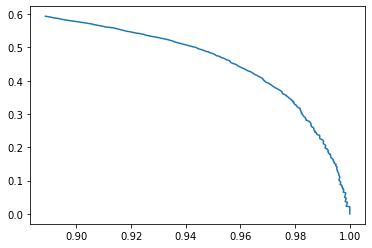

In [50]:
easy_p = []
easy_r = []
for i in range(0,1001,3):
    easy_p.append(curve[i,0])
    easy_r.append(curve[i,1])
plt.plot(easy_p,easy_r)
plt.show()

In [43]:
sns.color_palette('hls',9)
sns.set_palette(sns.color_palette('hls',9))

In [44]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.title_fontsize': None}

In [17]:
sns.set_context({'lines.linewidth':2.0,'grid.linewidth':2.0})
sns.set_style('darkgrid')

In [18]:
# models = ['centerface', 'dbface', 'facebox','lffdface','mtcnn','retinaface','retina_resface','ultraface','yoloface']
models = ['CenterFace','LFFD','MTCNN','RetinaFace','YOLO5Face','dbface']
# models = ['retina_resface']
aps_dict = {}
pr_dict = {}
pr_dict1 = {}
pr_dict2 = {}
validation = os.path.join(os.path.abspath('./'),'validation\\')

In [19]:
for name in models:
    aps = name+'\\aps.npy'
    pr = name + '\\pr_curve0.npy'
    pr1 = name + '\\pr_curve1.npy'
    pr2 = name + '\\pr_curve2.npy'
    aps_path = os.path.join(validation,aps)
    pr_path = os.path.join(validation,pr)
    pr_path1 = os.path.join(validation,pr1)
    pr_path2 = os.path.join(validation,pr2)
    aps_dict[name] = np.load(aps_path)
    pr_dict[name] = np.load(pr_path)
    pr_dict1[name] = np.load(pr_path1)
    pr_dict2[name] = np.load(pr_path2)

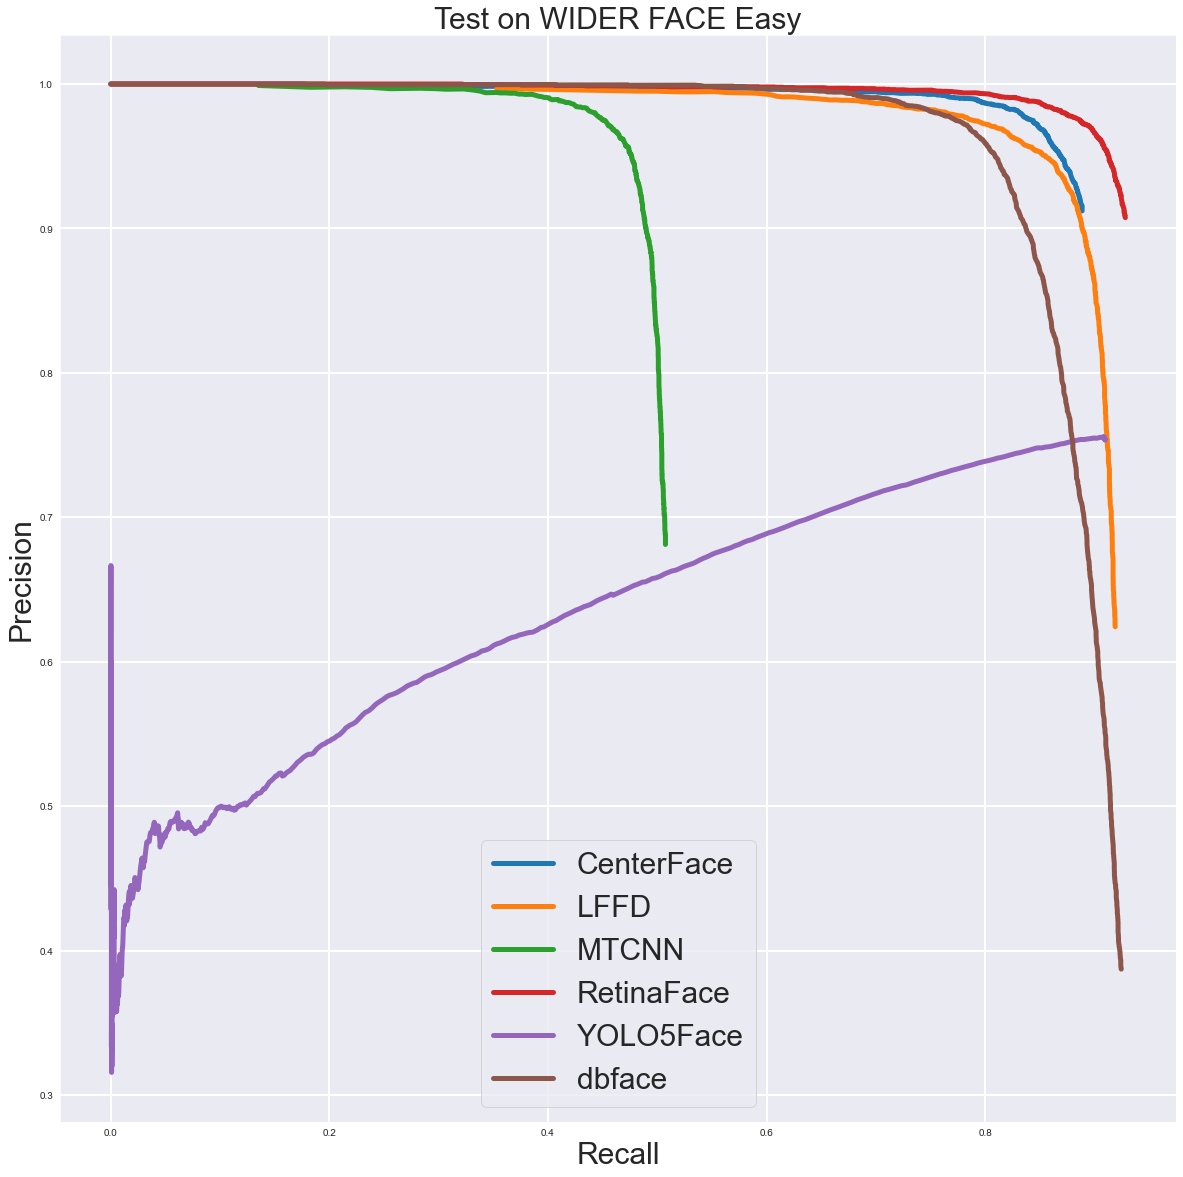

In [20]:
plt.rcParams['figure.figsize'] = (20,20)
for key in pr_dict.keys():
    easy_p = []
    easy_r = []
    curve = pr_dict[key]
    for i in range(1000):
        easy_p.append(curve[i,0])
        easy_r.append(curve[i,1])
    plt.plot(easy_r,easy_p,label=key,lw=5)
    plt.xlabel('Recall',fontsize=30)
    plt.ylabel('Precision',fontsize=30)
    plt.legend(loc='best', fontsize=30)
    plt.title('Test on WIDER FACE Easy',fontsize=30)
plt.show()

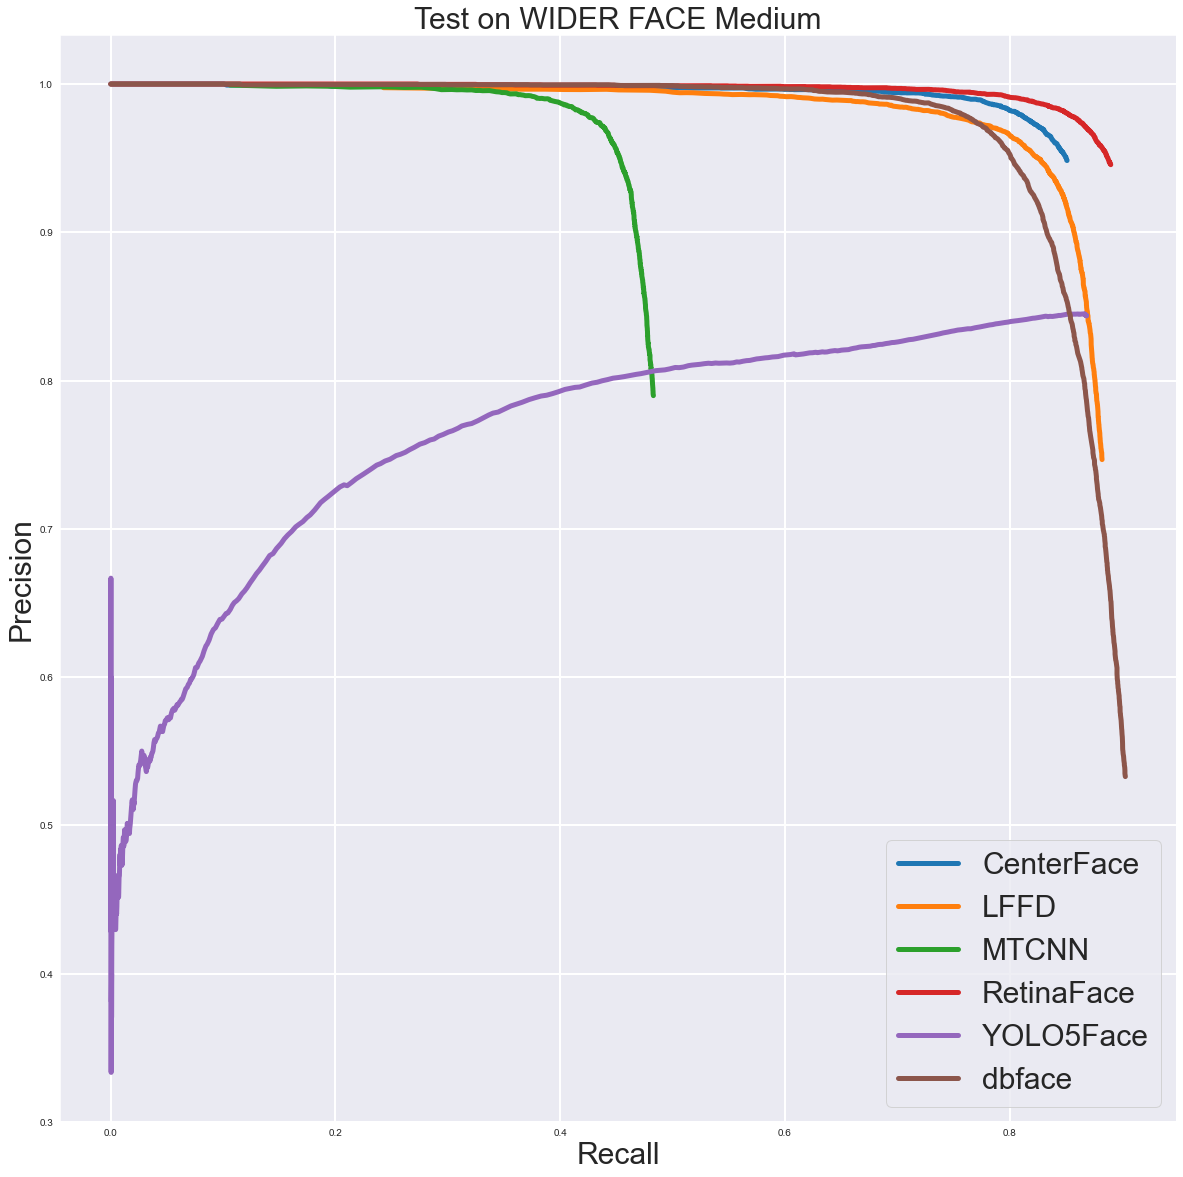

In [21]:
plt.rcParams['figure.figsize'] = (20,20)
for key in pr_dict1.keys():
    easy_p = []
    easy_r = []
    curve = pr_dict1[key]
    for i in range(1000):
        easy_p.append(curve[i,0])
        easy_r.append(curve[i,1])
    plt.plot(easy_r,easy_p,label=key,lw=5)
    plt.xlabel('Recall',fontsize=30)
    plt.ylabel('Precision',fontsize=30)
    plt.legend(loc='best', fontsize=30)
    plt.title('Test on WIDER FACE Medium',fontsize=30)
plt.show()

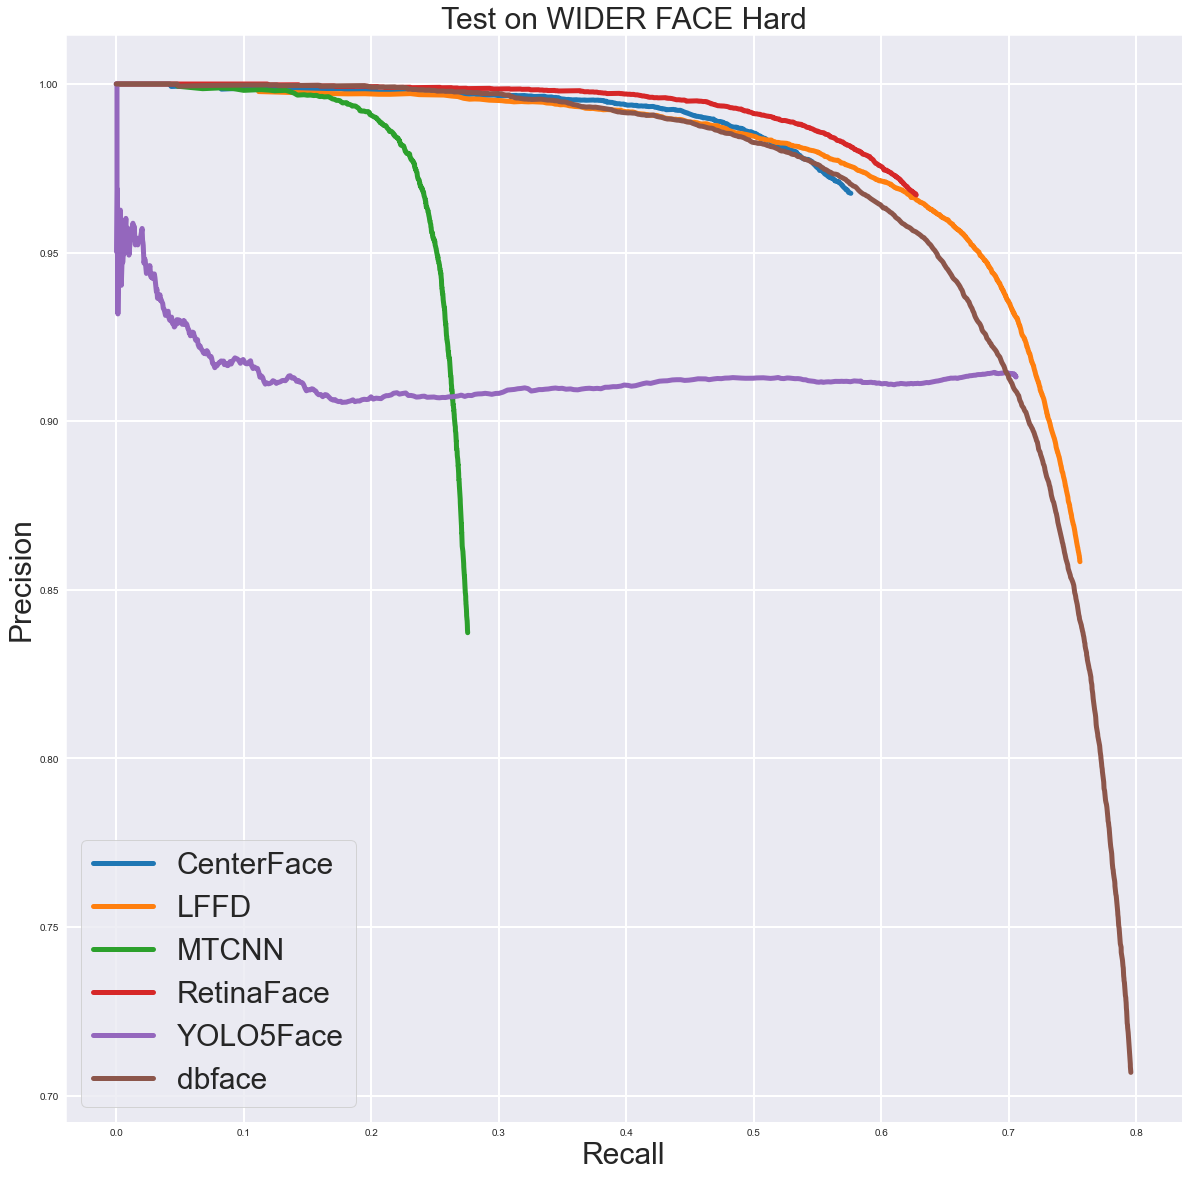

In [22]:
plt.rcParams['figure.figsize'] = (20,20)
for key in pr_dict2.keys():
    easy_p = []
    easy_r = []
    curve = pr_dict2[key]
    for i in range(1000):
        easy_p.append(curve[i,0])
        easy_r.append(curve[i,1])
    plt.plot(easy_r,easy_p,label=key,lw=5)
    plt.xlabel('Recall',fontsize=30)
    plt.ylabel('Precision',fontsize=30)
    plt.legend(loc='best', fontsize=30)
    plt.title('Test on WIDER FACE Hard',fontsize=30)
plt.show()

In [51]:
aps_dict

{'centerface': array([0.88369163, 0.84745218, 0.57269981]),
 'dbface': array([0.89100692, 0.86103786, 0.69475946]),
 'facebox': array([0.80979324, 0.71003938, 0.33401397]),
 'lffdface': array([0.90338341, 0.8693773 , 0.74154548]),
 'mtcnn': array([0.5004535 , 0.47726789, 0.27167659]),
 'retinaface': array([0.83818834, 0.76807687, 0.43131064]),
 'retina_resface': array([0.92379213, 0.88711375, 0.62437084]),
 'ultraface': array([0.6163011 , 0.45199426, 0.19966752]),
 'yoloface': array([0.77717415, 0.7642729 , 0.57736948])}

In [52]:
import pandas as pd
from pandas import DataFrame, Series

In [53]:
per_df = DataFrame(aps_dict.values(),index=aps_dict.keys(),columns=['Easy','Medium','Hard'])

In [54]:
per_df

,Easy,Medium,Hard
centerface,0.883692,0.847452,0.572700
dbface,0.891007,0.861038,0.694759
facebox,0.809793,0.710039,0.334014
lffdface,0.903383,0.869377,0.741545
mtcnn,0.500453,0.477268,0.271677
retinaface,0.838188,0.768077,0.431311
retina_resface,0.923792,0.887114,0.624371
ultraface,0.616301,0.451994,0.199668
yoloface,0.777174,0.764273,0.577369


In [58]:
per_df = per_df.sort_values(by='Easy',ascending=False)

In [59]:
per_df = per_df.sort_values(by='Medium',ascending=False)

In [60]:
per_df

,Easy,Medium,Hard
lffdface,0.903383,0.869377,0.741545
dbface,0.891007,0.861038,0.694759
retina_resface,0.907041,0.860906,0.552620
centerface,0.883692,0.847452,0.572700
retinaface,0.838188,0.768077,0.431311
yoloface,0.777174,0.764273,0.577369
facebox,0.809793,0.710039,0.334014
mtcnn,0.500453,0.477268,0.271677
ultraface,0.616301,0.451994,0.199668


In [61]:
per_df.to_csv('model_performance.csv')

In [63]:
per_df.apply(lambda x:round(x*100,2))

,Easy,Medium,Hard
lffdface,90.34,86.94,74.15
dbface,89.10,86.10,69.48
retina_resface,90.70,86.09,55.26
centerface,88.37,84.75,57.27
retinaface,83.82,76.81,43.13
yoloface,77.72,76.43,57.74
facebox,80.98,71.00,33.40
mtcnn,50.05,47.73,27.17
ultraface,61.63,45.20,19.97


In [123]:
sns.set()

In [44]:
test = cv2.imread('./test2.jpg')
test = cv2.cvtColor(test,cv2.COLOR_RGB2BGR)

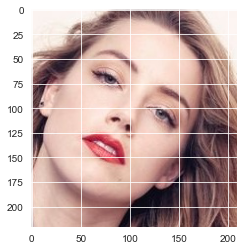

In [45]:
plt.imshow(test)

In [46]:
result, roi = lffdface_detect.detect(test)

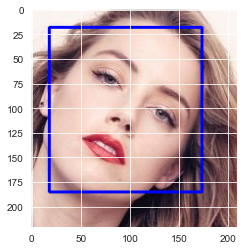

In [47]:
plt.imshow(result)

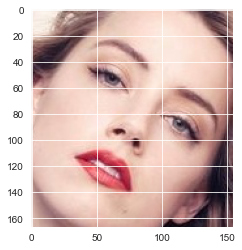

In [48]:
plt.imshow(roi[0])

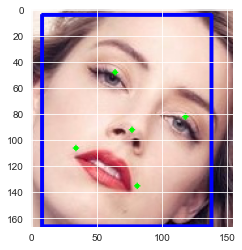

In [51]:
d_res, d_roi = dbface_detect.detect(roi[0])
plt.imshow(d_res)

In [29]:
boxes,_ = dbface_detect.get_face(roi[0])

In [30]:
boxes[0]

[8, 4, 138, 166, 0.7933822, 64, 48, 118, 82, 77, 92, 34, 106, 81, 135]

In [31]:
lms = boxes[0][5:]

C:\Users\trist\AppData\Local\Temp\ipykernel_38084\310522173.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


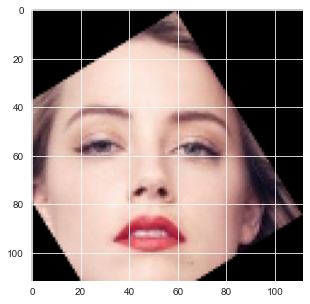

In [35]:
REFERENCE_FACIAL_POINTS = np.array([
    [30.29459953,  51.69630051],
    [65.53179932,  51.50139999],
    [48.02519989,  71.73660278],
    [33.54930115,  92.3655014],
    [62.72990036,  92.20410156]
], np.float32)

from numpy.linalg import inv, norm, lstsq
from numpy.linalg import matrix_rank as rank

def findNonreflectiveSimilarity(uv, xy, K=2):

    M = xy.shape[0]
    x = xy[:, 0].reshape((-1, 1))  # use reshape to keep a column vector
    y = xy[:, 1].reshape((-1, 1))  # use reshape to keep a column vector

    tmp1 = np.hstack((x, y, np.ones((M, 1)), np.zeros((M, 1))))
    tmp2 = np.hstack((y, -x, np.zeros((M, 1)), np.ones((M, 1))))
    X = np.vstack((tmp1, tmp2))

    u = uv[:, 0].reshape((-1, 1))  # use reshape to keep a column vector
    v = uv[:, 1].reshape((-1, 1))  # use reshape to keep a column vector
    U = np.vstack((u, v))

    # We know that X * r = U
    if rank(X) >= 2 * K:
        r, _, _, _ = lstsq(X, U)
        r = np.squeeze(r)
    else:
        raise Exception('cp2tform:twoUniquePointsReq')

    sc = r[0]
    ss = r[1]
    tx = r[2]
    ty = r[3]

    Tinv = np.array([
        [sc, -ss, 0],
        [ss,  sc, 0],
        [tx,  ty, 1]
    ])


    T = inv(Tinv)

    T[:, 2] = np.array([0, 0, 1])

    T = T[:, 0:2].T

    return T

similar_trans_matrix = findNonreflectiveSimilarity(np.array(lms).astype(np.float32).reshape(5,2), REFERENCE_FACIAL_POINTS)

aligned_face = cv2.warpAffine(roi[0].copy(), similar_trans_matrix, (112, 112))
# aligned_face = cv2.cvtColor(aligned_face, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(5, 5))
plt.imshow(aligned_face)
plt.show()

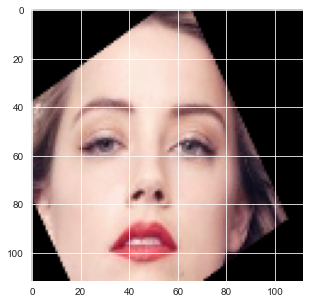

In [36]:
trans_matrix = cv2.getAffineTransform(np.array(lms[:6]).astype(np.float32).reshape(3,2), REFERENCE_FACIAL_POINTS[:3])
aligned_face = cv2.warpAffine(roi[0].copy(), trans_matrix, (112, 112))
# aligned_face = cv2.cvtColor(aligned_face, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(5, 5))
plt.imshow(aligned_face)
plt.show()